In [44]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
# Read the CSV file
df = pd.read_csv('mcdonalds.csv')

In [45]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


R> library("MSA")

R> data("mcdonalds", package = "MSA")

R> names(mcdonalds)



In [46]:
# Get the column names
column_names = df.columns.tolist()
# Print the column names
print(column_names)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


R> dim(mcdonalds)

In [47]:
df.shape

(1453, 15)

R> head(mcdonalds, 3)

In [48]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


R> MD.x <- as.matrix(mcdonalds[, 1:11])

R> MD.x <- (MD.x == "Yes") + 0

R> round(colMeans(MD.x), 2)

In [49]:
MD_x = df.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)
col_means = np.round(np.mean(MD_x, axis=0), 2)
print(col_means)

[0.6 0.9 0.1 0.9 0.5 0.9 0.6 0.6 0.4 0.2 0.2]


R> MD.pca <- prcomp(MD.x)

R> summary(MD.pca)

In [50]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
print("Standard deviations:")
print(pca.explained_variance_)
print("\nProportion of variance explained:")
print(pca.explained_variance_ratio_)
print("\nCumulative proportion of variance explained:")
print(np.cumsum(pca.explained_variance_ratio_))

Standard deviations:
[0.6 0.4 0.3 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Proportion of variance explained:
[0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]

Cumulative proportion of variance explained:
[0.3 0.5 0.6 0.7 0.8 0.8 0.9 0.9 0.9 1.  1. ]


R> print(MD.pca, digits = 1)

In [51]:
MD_pca = pca.fit_transform(MD_x)
np.set_printoptions(precision=1, suppress=True)
print(MD_pca)

[[ 0.4 -0.2  0.7 ...  0.2  0.5 -0.6]
 [-0.2  0.4 -0.7 ...  0.1  0.5 -0.5]
 [ 0.4  0.7 -0.1 ... -0.3  0.1  0.2]
 ...
 [-0.2  1.1  0.2 ...  0.   0.1 -0. ]
 [-1.2 -0.   0.6 ...  0.  -0.  -0.1]
 [ 1.6  0.3 -0.  ... -0.1 -0.4 -0.5]]


R> library("flexclust")

R> plot(predict(MD.pca), col = "grey")

R> projAxes(MD.pca)

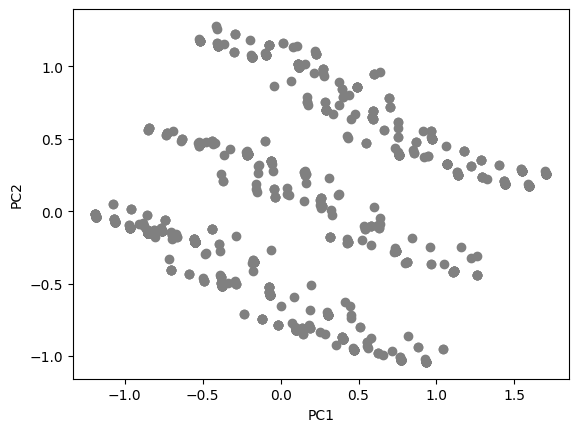

In [52]:
MD_pca = pca.fit_transform(MD_x)

plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


R> set.seed(1234)

R> MD.km28 <- stepFlexclust(MD.x, 2:8, nrep = 10,+ verbose = FALSE)

R> MD.km28 <- relabel(MD.km28)


In [53]:
np.random.seed(1234)
k_range = range(2, 9)
best_k = None
best_labels = None
best_inertia = float('inf')

for k in k_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=1234)
    km.fit(MD_x)
    if km.inertia_ < best_inertia:
        best_k = k
        best_labels = km.labels_
        best_inertia = km.inertia_


MD_km28 = best_labels

print("Best number of clusters:", best_k)
print("Cluster assignments:", MD_km28)


Best number of clusters: 8
Cluster assignments: [4 2 5 ... 5 3 0]


R> plot(MD.km28, xlab = "number of segments")

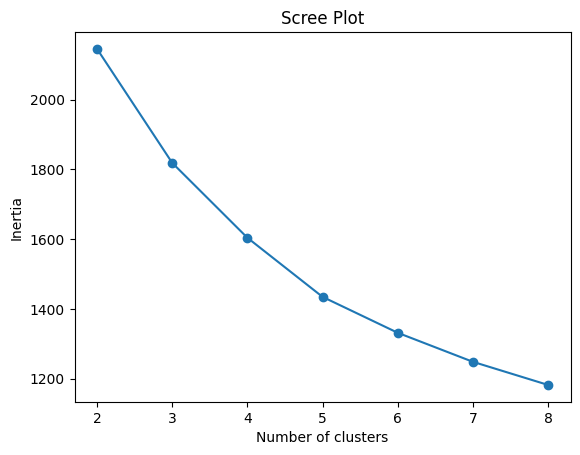

In [54]:
np.random.seed(1234)
k_range = range(2, 9)
inertia_values = []

for k in k_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=1234)
    km.fit(MD_x)
    inertia_values.append(km.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot')
plt.show()

R> histogram(MD.km28[["4"]], data = MD.x, xlim = 0:1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


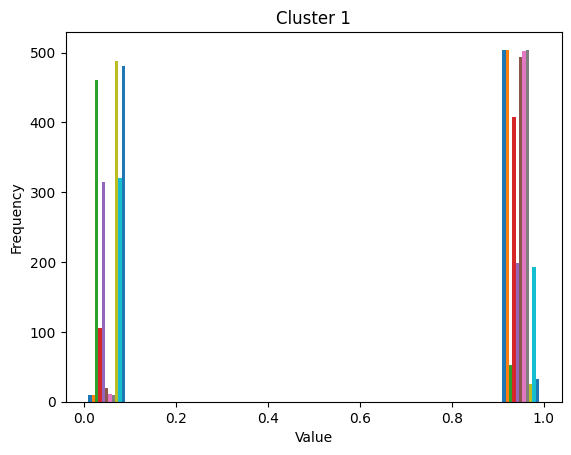

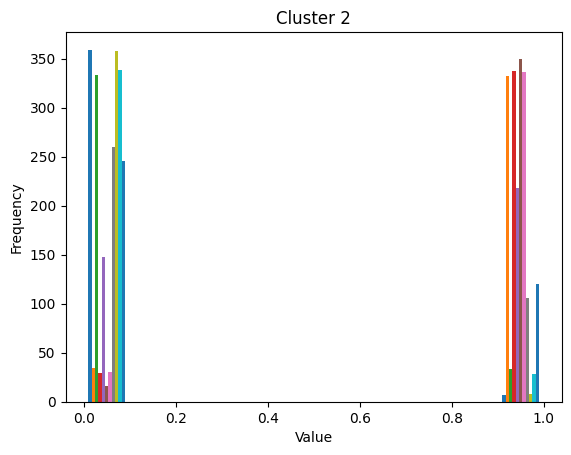

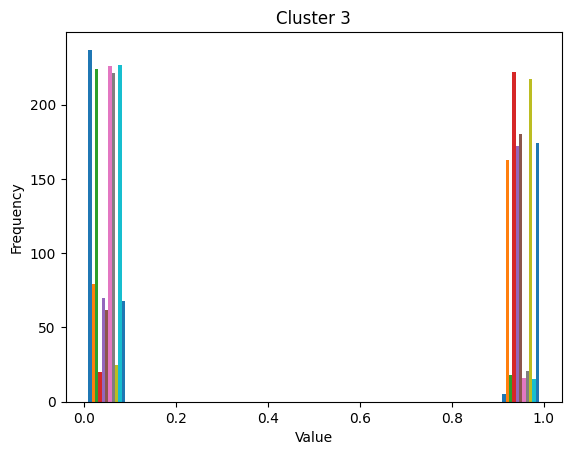

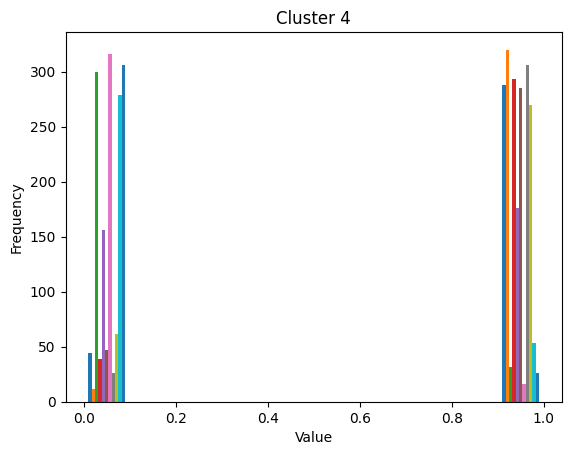

In [55]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
labels = kmeans.fit_predict(MD_x)
for i in range(k):
    cluster_data = MD_x[labels == i]
    plt.figure()
    plt.hist(cluster_data, bins=10, range=[0, 1])
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Cluster {i+1}')
    plt.show()

R> MD.k4 <- MD.km28[["4"]]
R> MD.r4 <- slswFlexclust(MD.x, MD.k4)
R> plot(MD.r4, ylim = 0:1, xlab = "segment number",
+ ylab = "segment stability")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


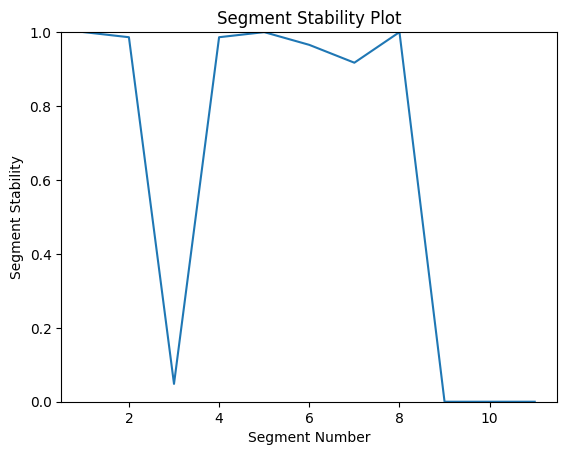

In [56]:
k = 28
kmeans = KMeans(n_clusters=k, random_state=1234)
labels = kmeans.fit_predict(MD_x)
cluster_label = 3
MD_k4 = MD_x[labels == cluster_label]
segment_stability = np.mean(MD_k4, axis=0)
segment_numbers = range(1, len(segment_stability) + 1)
plt.plot(segment_numbers, segment_stability)
plt.ylim([0, 1])
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Stability Plot')
plt.show()

R> MD.m4a <- flexmix(MD.x ~1, cluster = clusters(MD.k4),
  + model = FLXMCmvbinary())
R> table(kmeans = clusters(MD.k4),
+ mixture = clusters(MD.m4a))

In [57]:
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.labels_
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)
cluster_table = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})
print(cluster_table)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      kmeans  mixture
0          1        1
1          3        3
2          3        3
3          0        3
4          1        3
...      ...      ...
1448       2        3
1449       0        1
1450       3        1
1451       0        1
1452       2        3

[1453 rows x 2 columns]
